In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
DATASET_RAW_PATH = r"data\raw"
DATASET_INTERIM_PATH = r"data\interim"

In [10]:
processed_data = pd.read_csv(os.path.join("..", DATASET_INTERIM_PATH, "with_regions_and_urbanicity.csv"))

In [11]:
processed_data.head()

,Description,Location,Price,Bedrooms,Bathrooms,Floor Area,Land Area,Region,Urbanicity
0,Preselling 2-Storey Townhouses in Village East...,"Santo Domingo, Cainta",9500000.0,4.0,3.0,144.00,136.0,Region IV-A,Urban
1,Affordable House & Lot with Complete Amenities...,"San Vicente, Santa Maria",4400000.0,3.0,2.0,63.20,80.0,Region III,Urban
2,5BR 2-Storey House and Lot for Sale in Tarlac ...,"Camella Tarlac Access Rd. Maliwalo, Tarlac",7810000.0,5.0,3.0,100.00,110.0,Region III,Urban
3,Futura Homes Zamboanga | Amber 2BR Townhouse E...,"Zambowood Rd. Boalan, Zamboanga",3275000.0,2.0,1.0,40.32,78.4,Region XI,Urban
4,2BR 2-Storey Townhouse for Sale at Marytown Pl...,"Santa Maria-San Jose Rd. Bulac, Santa Maria",1800000.0,2.0,2.0,52.00,40.0,Region III,Urban


Description and Location columns will be dropped because they were already used to determine the regions from `preprocessing.ipynb`

In [12]:
# Drop Description and Location columns
processed_data.drop(['Description', 'Location'], axis=1, inplace=True)

In [13]:
# Determine the number of rows with no floor and land area
len(processed_data[processed_data['Floor Area'].isnull() | processed_data['Land Area'].isnull()])

42

Data imputation might provide misleading patterns that the model learns. We want the model to be as authentic as possible. Personally, I want to avoid it as much as possible and only use it in dire cases such as keeping a time series data complete to form the trend (e.g., weather or stocks).

Since there are only 42 rows with no indicated floor and land area, removing them will not hurt much.

In [14]:
# Drop rows with no floor and land area
processed_data = processed_data.dropna(subset=['Floor Area', 'Land Area'])

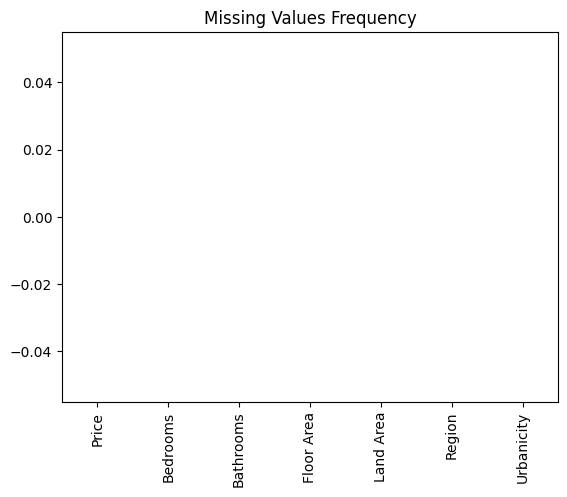

In [15]:
# Check for missing values
plt.title("Missing Values Frequency")
processed_data.isnull().sum().plot(kind='bar')
plt.show()

There are no more missing values. This is now considered as a **clean data** and can be used for exploratory data analysis.

In [16]:
# Export as an interim data
# It is not the final processed data yet
processed_data.to_csv(os.path.join("..", DATASET_INTERIM_PATH, "cleaned_data.csv"), index=False)